##  Homework

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.fftpack as ft
import scipy.ndimage as nd
from scipy import ndimage, misc

def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1, b2 = np.indices(size)
    b1, b2 = b1-loc[0], b2-loc[1]
    mask = b1 * b1 + b2 * b2
    mask = (mask <= rad * rad).astype(int)
    return mask

def Wedge(vh, t1, t2): 
    ans = np.zeros(vh)
    ndx = np.indices(vh).astype(float) 
    ndx[0] = ndx[0] - vh[0]/2
    ndx[1] = ndx[1] - vh[1]/2 
    mask = ndx[0] == 0
    ndx[0] = (1-mask)*ndx[0] + mask*1e-10 
    ans =  np.arctan(  ndx[1]  / ndx[0]  ) 
    ans = ans + np.pi/2
    mask = ans >= t1/180.* np.pi 
    mask2 = ans < t2/180.* np.pi
    mask = np.logical_and( mask, mask2).astype(int)
    V,H = vh
    mask[V//2, H//2] = 0 
    return mask

<b> <br> <br> 1.  Apply a low-pass filter to the USAF1951w.jpg image using a circular mask of 50 pixels in radius centered on the window.  What differences are created as compared to the 10 pixel radius used in class?


Shape of Tests Image (2260, 2315)


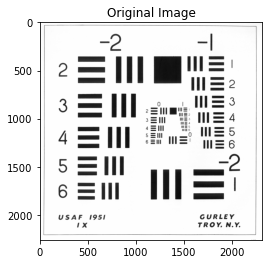

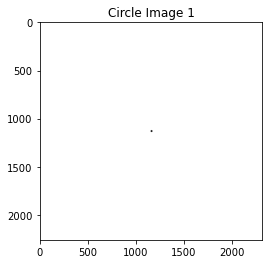

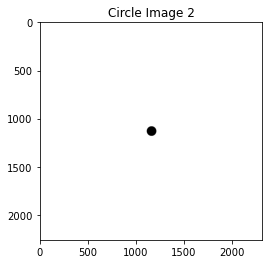

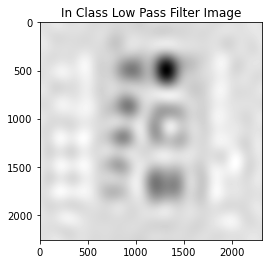

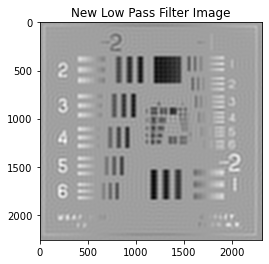

In [2]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, as_gray=True)

print('\nShape of Tests Image', amg.shape)
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = 1 - amg/amg.max()                   #  reverses the bright and dark pixels
cmg = ft.fftshift(ft.fft2(bmg))           #  compute Fourier Transform

V, H = cmg.shape                          #  obtain the image shape
circ1 = Circle((V,H), (V/2,H/2), 10)       #  create the mask
circ2 = Circle((V,H), (V/2,H/2), 50)       #  create the mask
plt.title('Circle Image 1')
plt.imshow(-circ1, cmap='gray')
plt.show()

plt.title('Circle Image 2')
plt.imshow(-circ2, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ1 * cmg))   #  compute the inverse FFT of the mask multiplied by the previous FFT
emg = ft.ifft2(ft.fftshift(circ2 * cmg))


plt.title('In Class Low Pass Filter Image')
plt.imshow(dmg.real, cmap='gray')
plt.show()

plt.title('New Low Pass Filter Image')
plt.imshow(emg.real, cmap='gray')
plt.show()

<span style="color:blue"> It looks like the biggest difference between both of the images is the amount of data well retained. In the new low pass filter image, much more of the edges are retained than in the first example. 

<b> <br> <br> 2.  Use a bandpass filter on the USAF1951w.jpg image with r1 = 32 and r2 = 64 centered on the window.  Describe your results.

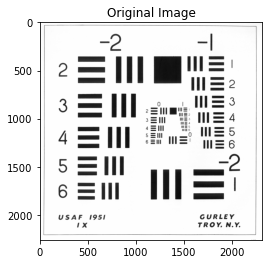

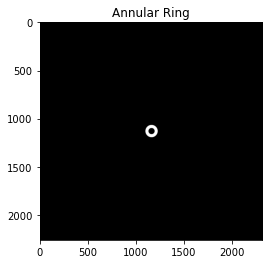

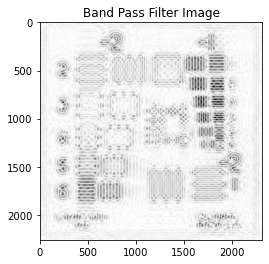

In [3]:
#  band pass filter
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

#  create the annular ring
circ1 = Circle((V,H), (V/2,H/2), 32)
circ2 = Circle((V,H), (V/2,H/2), 64)
circ = circ2 - circ1

plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

cmg = ft.fftshift(ft.fft2(amg))           #  compute Fourier Transform
dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

<span style="color:blue"> In this example, a greater range of values are retained than the example in class because the annular ring has a greater thickness.  

<b> <br> <br> 3. Use the Smooth Edge code with an inner circle of 32 pixels and the outer circle of 64 pixels to smooth the edges of the USAF1951w.jpg image with a maximum filter of size 10 and then a minimun filter of size 10 centered on the image.  Describe the differences.

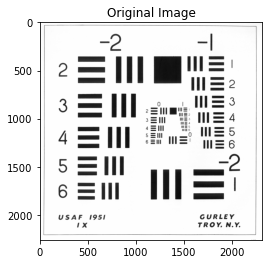

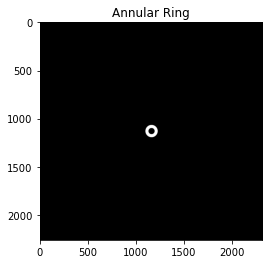

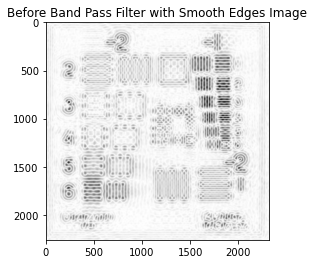

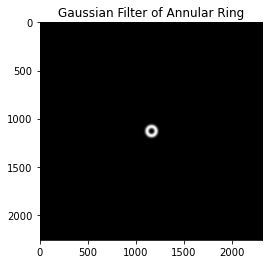

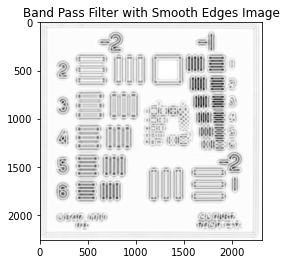

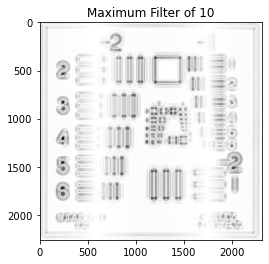

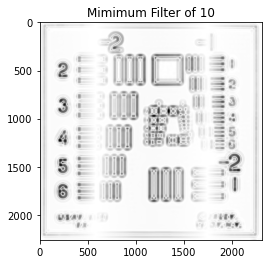

In [7]:


plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

circ1 = Circle((V,H), (V/2,H/2), 32)
circ2 = Circle((V,H), (V/2,H/2), 64)
circ = circ2 - circ1
plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

ddmg = ft.ifft2(ft.fftshift(circ*cmg))
plt.title('Before Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(ddmg), cmap='gray')
plt.show()

circ = nd.gaussian_filter(circ+0.0, sigma=10)
plt.title('Gaussian Filter of Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()


emg = ndimage.maximum_filter(dmg.real, size = 10)
fmg = ndimage.minimum_filter(dmg.real, size = 10)

plt.title('Maximum Filter of 10')
plt.imshow(-abs(emg), cmap='gray')
plt.show()

plt.title('Mimimum Filter of 10')
plt.imshow(-abs(fmg), cmap='gray')
plt.show()

<span style="color:blue"> I'm a little confused by the result since it didn't do at all what I expected it to do. it looks like the minimum and maximum filter removed some of the same areas, but mostly filtered out the center of the left and right half of the photo, without much of a difference between the two.

<b> <br> <br> 4.  Using the lines.png file, create a wedge filter to eliminate the other set of parallel lines (the ones moving from the top laft to the bottom right).


In [ ]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/lines.png'
adata = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

ddata = ft.fftshift(ft.fft2(adata))
V,H = adata.shape

mdata = Wedge((V,H), 120, 130)
plt.title('Wedge Filter')
plt.imshow(mdata, cmap='gray')
plt.show()

bdata = ft.ifft2(ft.fftshift (ddata * mdata))

plt.title('Negative of the image after passing through a wedge filter')
plt.imshow(abs(bdata), cmap='gray')
plt.show()